In [15]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2


In [6]:
black_img = np.zeros([20,20,1])


Text(0, 0.5, 'Number of Pixels')

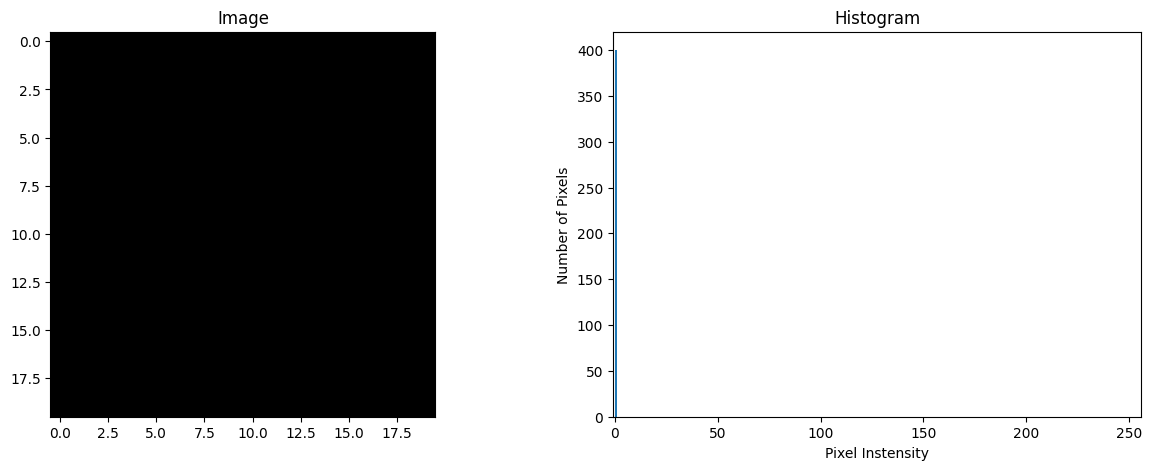

In [7]:
fig, ax = plt.subplots(1,2, figsize=(15,5))
ax[0].imshow(black_img, cmap='gray'); ax[0].set_title("Image")

ax[1].hist(black_img.flatten(), bins=256, range=(0,255)); ax[1].set_xlim([-1,256]); 
ax[1].set_title("Histogram"); ax[1].set_xlabel("Pixel Instensity"); ax[1].set_ylabel("Number of Pixels")


In [8]:
img =  cv2.imread("../data/checkerboard_18x18.png",0) # 0 = cv2.IMREAD_GRAYSCALE

print(f"shape:{img.shape}, Unique:{np.unique(img)}")


shape:(18, 18), Unique:[  0 255]


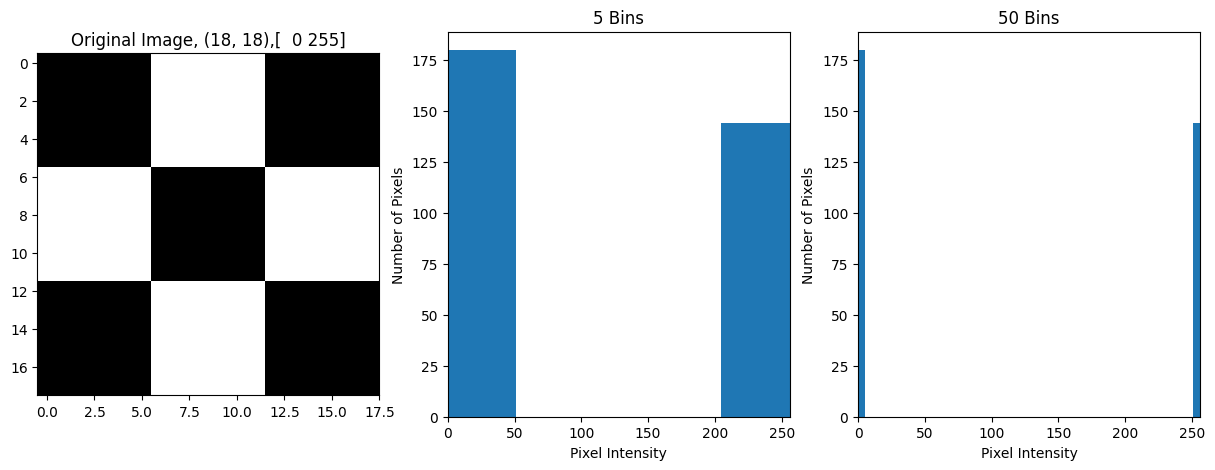

In [9]:
fig, ax = plt.subplots(1,3, figsize=(15,5))
ax[0].imshow(img,cmap='gray'); ax[0].set_title(f"Original Image, {img.shape},{np.unique(img)}")

bins=5
ax[1].hist(img.flatten(), bins, [0,256]);ax[1].set_title(f"{bins} Bins")

bins=50
ax[2].hist(img.flatten(), bins, [0,256]);ax[2].set_title(f"{bins} Bins")

for axis in ax[1:]:
    axis.set_ylabel("Number of Pixels")
    axis.set_xlabel("Pixel Intensity")
    axis.set_xlim([0,256])

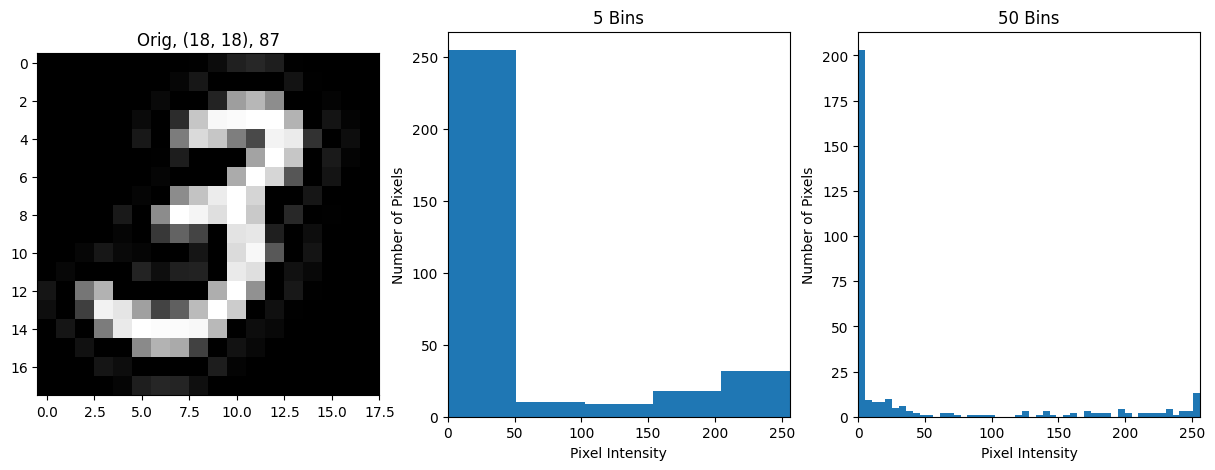

In [10]:
img = cv2.imread("../data/MNIST_3_18x18.png",0)

fig, ax = plt.subplots(1,3, figsize=(15,5))
ax[0].imshow(img, cmap="gray"); ax[0].set_title(f"Orig, {img.shape}, {len(np.unique(img))}")

bins = 5
ax[1].hist(img.flatten(), bins, [0,256]); ax[1].set_title(f"{bins} Bins")

bins = 50
ax[2].hist(img.flatten(), bins, [0,256]); ax[2].set_title(f"{bins} Bins")

for axis in ax[1:]:
    axis.set_xlabel("Pixel Intensity")
    axis.set_ylabel("Number of Pixels")
    axis.set_xlim([0,256])

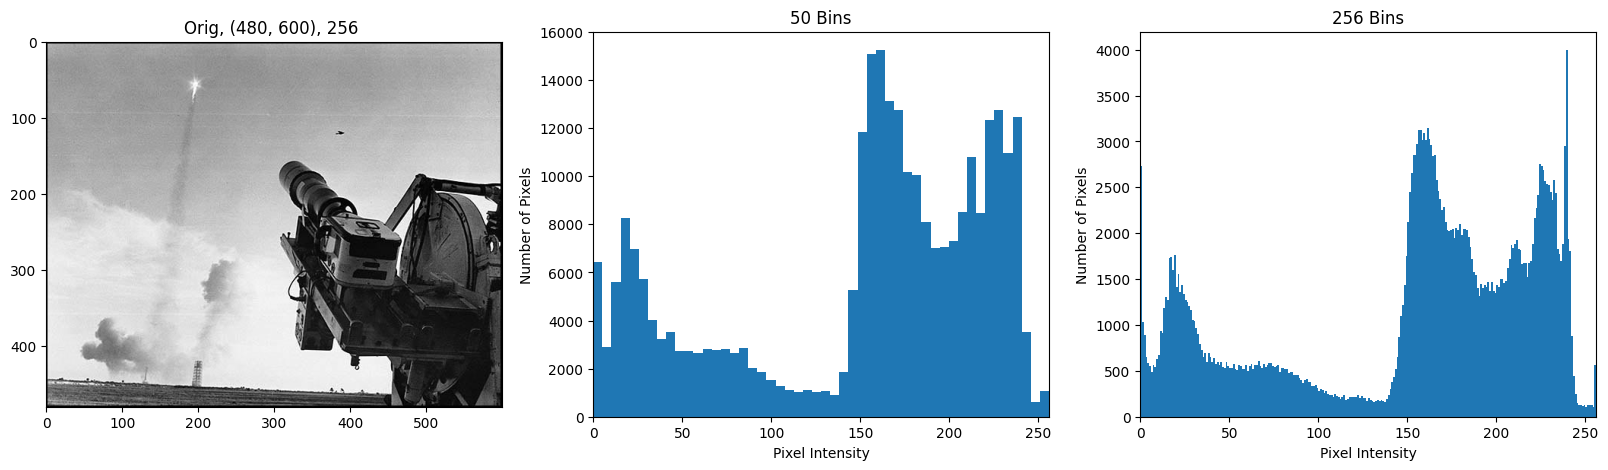

In [21]:
img = cv2.imread("../data/Apollo-8-Launch.jpg",0)

fig, ax = plt.subplots(1,3, figsize=(20,5))

ax[0].imshow(img, cmap="gray"); ax[0].set_title(f"Orig, {img.shape}, {len(np.unique(img))} ")

bins = 50
ax[1].hist(img.flatten(), bins, [0,256]); ax[1].set_title(f"{bins} Bins")

bins = 256
ax[2].hist(img.flatten(), bins, [0,256]); ax[2].set_title(f"{bins} Bins")

for axe in ax[1:]:
    axe.set_xlabel("Pixel Intensity")
    axe.set_ylabel("Number of Pixels")
    axe.set_xlim([0,256])

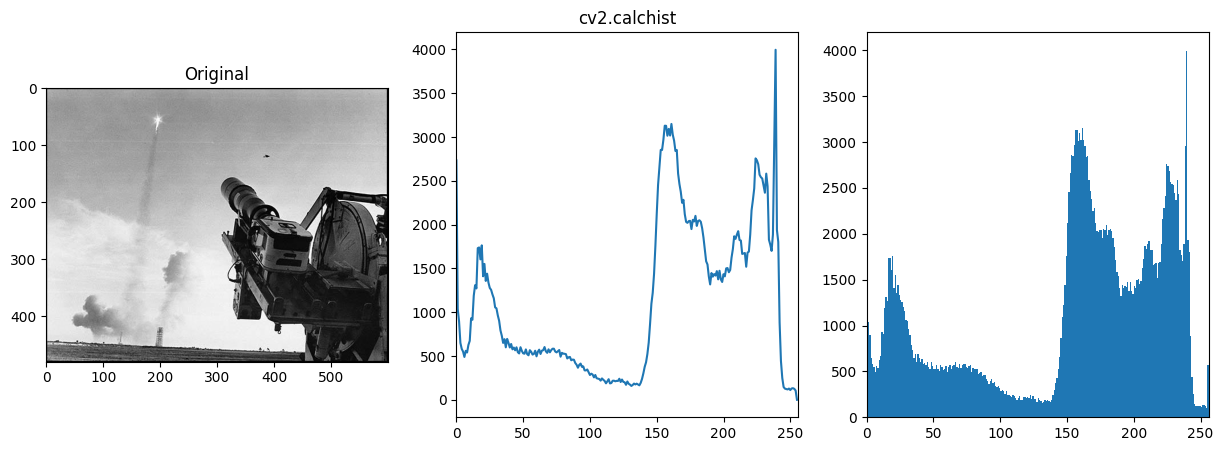

In [32]:
# Calculate the histograms
hist = cv2.calcHist(images = [img], channels = [0], mask = None, histSize = [256], ranges = [0,255])

# Flatten 
img_flatten = img.flatten()

# Plot
fig, ax = plt.subplots(1,3, figsize=(15,5))


ax[0].imshow(img, cmap='gray'); ax[0].set_title("Original")
ax[1].plot(hist); ax[1].set_title("cv2.calchist")
ax[2].hist(img_flatten, bins=256, range=[0,256])

for axis in ax[1:]:
    axis.set_xlim([0,256])



### Different images can have identical histograms

(array([  0., 200.,   0., 200., 200., 200., 200.,   0., 200., 200., 200.,
        200.,   0., 200., 200., 200.,   0., 200., 200., 200., 200.,   0.,
        200., 200., 200.,   0., 200., 200., 200., 200.,   0., 200., 200.,
        200., 200.,   0., 200., 200., 200.,   0., 200., 200., 200., 200.,
          0., 200., 200., 200., 200.,   0., 200., 200., 200.,   0., 200.,
        200., 200., 200.,   0., 200., 200., 200., 200.,   0., 200., 200.,
        200.,   0., 200., 200., 200., 200.,   0., 200., 200., 200.,   0.,
        200., 200., 200., 200.,   0., 200., 200., 200., 200.,   0., 200.,
        200., 200.,   0., 200., 200., 200., 200.,   0., 200., 200., 200.,
        200.,   0., 200., 200., 200.,   0., 200., 200., 200., 200.,   0.,
        200., 200., 200., 200.,   0., 200., 200., 200.,   0., 200., 200.,
        200., 200.,   0., 200., 200., 200.,   0., 200., 200., 200., 200.,
          0., 200., 200., 200., 200.,   0., 200., 200., 200.,   0., 200.,
        200., 200., 200.,   0., 200., 

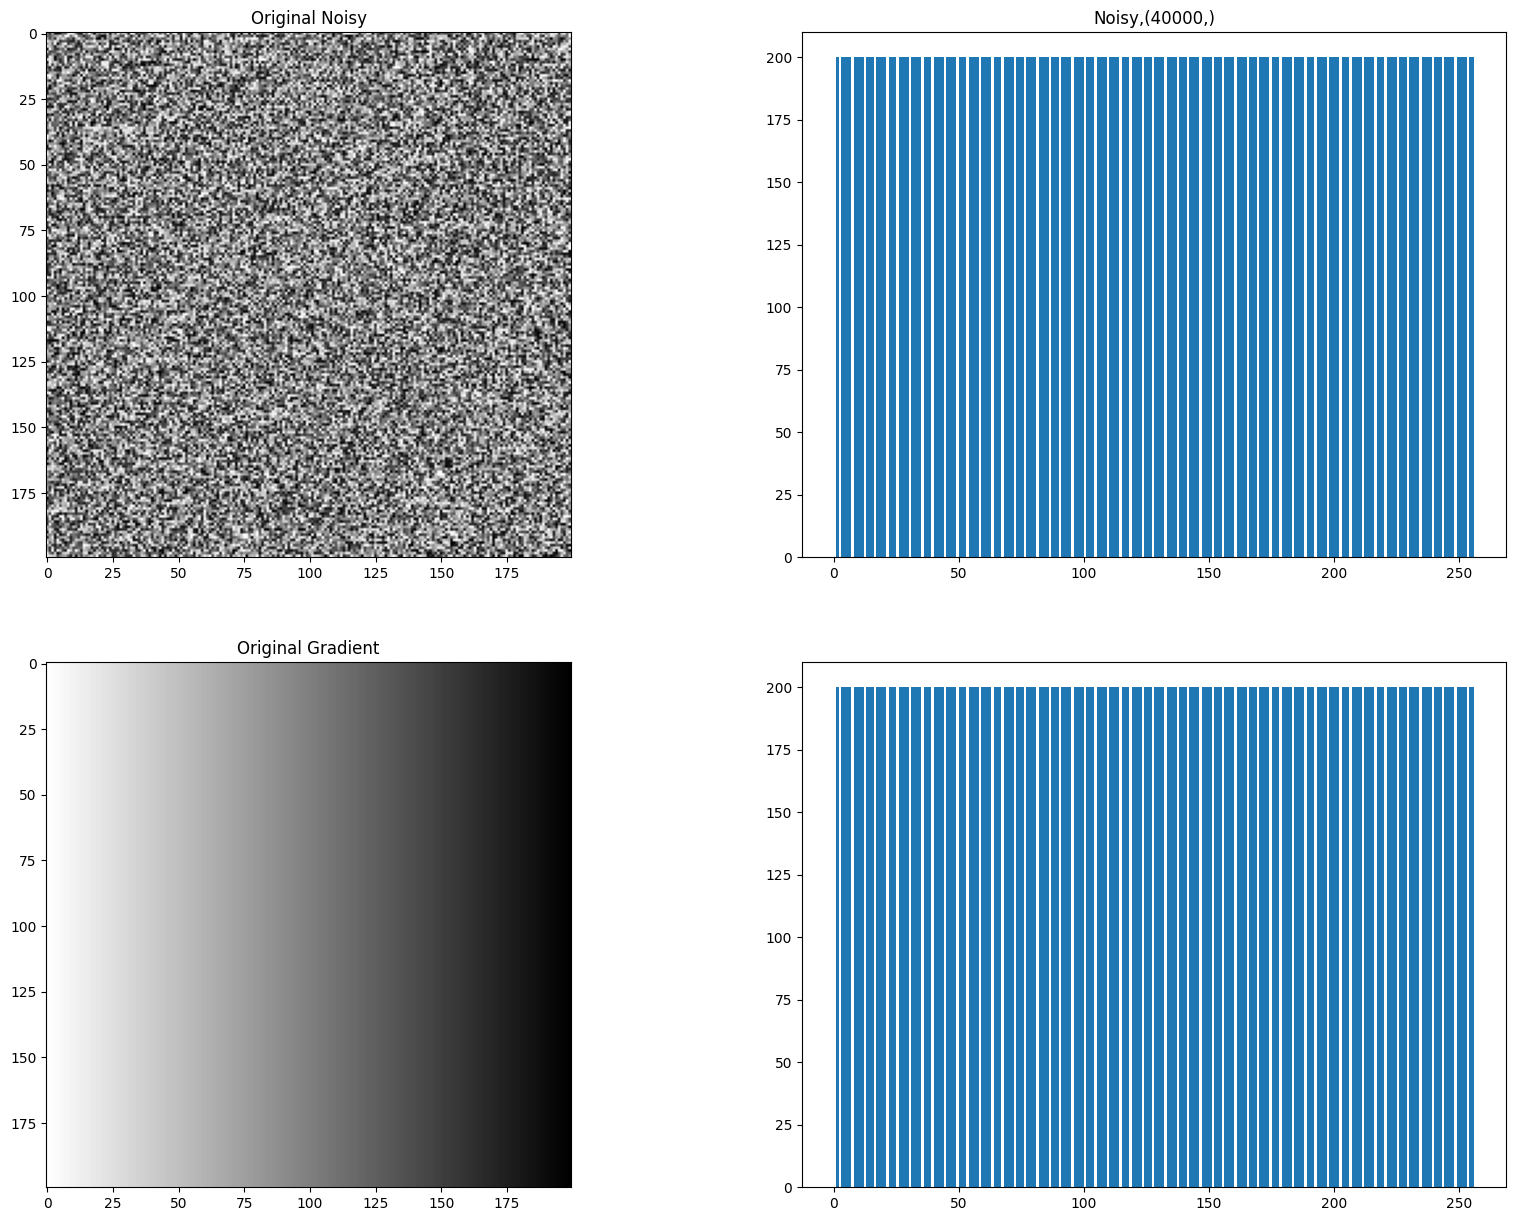

In [44]:
img_gradient = cv2.imread("../data/linear_graident.png",cv2.IMREAD_GRAYSCALE)
img_noisy = cv2.imread("../data/noisy.png",cv2.IMREAD_GRAYSCALE)

fig, ax = plt.subplots(2,2, figsize=(20,15))
ax[0,0].imshow(img_noisy, cmap="gray");     ax[0,0].set_title("Original Noisy")
ax[0,1].hist(img_noisy.flatten(), bins=256, range=[0,256]); ax[0,1].set_title(f"Noisy,{img_noisy.flatten().shape}")

ax[1,0].imshow(img_gradient, cmap="gray");  ax[1,0].set_title("Original Gradient") 
ax[1,1].hist(img_gradient.flatten(), bins=256, range=[0,256])

